In [56]:
import VoigtFit as vf
# from scipy.special import voigt_profile
import numpy as np
import matplotlib.pyplot as plt

In [57]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [58]:
zobs = .22601

In [59]:
wavelength, flux, error, continuum = np.loadtxt('data/spec_HE0153-4520_LA.dat', usecols=[0,1,2,3]).transpose()
normalized_flux = flux/continuum
dataset = vf.DataSet(zobs, name='LRG')
dataset.add_data(wavelength, normalized_flux, 18, err=error, normalized=True)
dataset.verbose = True

In [60]:
dataset.add_line('CIII_977')
# dataset.add_line('HI_930')
dataset.add_line('SiIII_1207')


The transition (SiIII_1207) not found in line list!


False

In [61]:
dataset.reset_components()
# dataset.add_component('HI_930', zobs, 30, 14, var_z=True, var_b=True, var_N=True, tie_z=None, tie_b=None, tie_N=None)
dataset.add_component('CIII', zobs, 30, 14, var_z=True, var_b=True, var_N=True, tie_z=None, tie_b=None, tie_N=None)
dataset.add_component('SiIII', zobs, 30, 14, var_z=True, var_b=True, var_N=True, tie_z=None, tie_b=None, tie_N=None)

In [62]:
dataset.prepare_dataset()
popt, chi2 = dataset.fit()


 [DONE] - Continuum fitting successfully finished.


 [WARNING] - Components defined for inactive or missing element: SiIII
             The components have been removed.


  Dataset is ready to be fitted.


  Fit is running... Please be patient.


 The fit has finished with the following exit message:
  Fit succeeded.


----------------------
  Best fit parameters:
----------------------

				b			log(N)
CIII  977
v = -10.4 ± 0.6             35.19 ±   0.88      14.0578 ±  0.0163




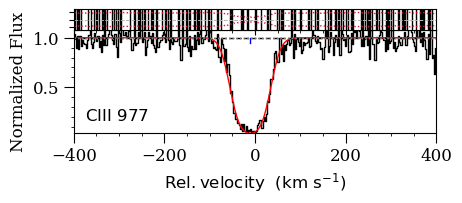


-------------------------
  Total Column Densities:
-------------------------

  logN(CIII) = 14.058 ± 0.016


In [63]:
dataset.plot_fit()
dataset.print_total()